# Welcome to the MLB Playoff Win Predictor
Let\'s see what is the most impactful single factor to a team in winning games in the postseason of Baseball

## Abstract
I will viewing at a number of telling statistics and trying to find one that has a strong correlation to playoff wins. While fully explaining the importance of these single statistics for the team and how they might contribute to a team's success in the playoffs.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
batting24 = pd.read_csv("Data/Batting24.csv")
fielding24 = pd.read_csv("Data/Fielding24.csv")
relief24 = pd.read_csv("Data/Relief24.csv")
salaries24 = pd.read_csv("Data/Salaries24.csv")
starting24 = pd.read_csv("Data/Starting24.csv")
batting24 = batting24.rename(columns = {'Tm':'Team'})
fielding24 = fielding24.rename(columns = {'Tm':'Team'})
relief24 = relief24.rename(columns = {'TEAM':'Team'})
starting24 = starting24.rename(columns = {'TEAM':'Team'})

def standarize_teams(team):
    return team[team.index('\n')+1:]
def standarize_money(money):
    #"$96,971,614"
    return int(money[1:].replace(',', ""))
relief24['Team'] = relief24['Team'].apply(standarize_teams)
starting24['Team'] = starting24['Team'].apply(standarize_teams)

fielding24 = fielding24[['Team', 'Rtot', 'Rdrs' ]].rename(columns = {'Rtot' : 'Total Zone', 'Rdrs' : "Defensive Runs Saved"})
batting24 = batting24[['Team', 'BatAge', 'R/G', 'HR', 'OPS', 'R','H','2B','3B','RBI','SB','CS','BB','SO','BA','OBP','SLG', 'OPS+','TB','GDP','HBP','SH','SF','IBB','LOB']].rename(columns = {'HR' : 'Home Runs', 'OPS' : "On Base Plus Slugging"})
starting24 = starting24[['Team', "WHIP", "ERA"]].rename(columns = {'WHIP' : "Starting Pitchers WHIP", "ERA" : "Starting Pitchers ERA"})
relief24 = relief24[['Team', "WHIP", "ERA"]].rename(columns = {'WHIP' : "Relief Pitchers WHIP", "ERA" : "Relief Pitchers ERA"})
salaries24 = salaries24[['Team', 'Total PayrollAllocations']].rename(columns = {'Total PayrollAllocations' : 'Team Salary'})

salaries24["Team Salary"] = salaries24["Team Salary"][1:].apply(standarize_money)

salaries24 = salaries24.dropna()
def mergetopia(dfs):
    totalmerge = dfs[0]
    for i in range(1, len(dfs)):
        totalmerge = pd.merge(totalmerge, dfs[i])
    return totalmerge
Team_Data24 = mergetopia([fielding24, batting24, starting24, relief24, salaries24])
Team_Data24



,Team,Total Zone,Defensive Runs Saved,BatAge,R/G,Home Runs,On Base Plus Slugging,R,H,2B,...,HBP,SH,SF,IBB,LOB,Starting Pitchers WHIP,Starting Pitchers ERA,Relief Pitchers WHIP,Relief Pitchers ERA,Team Salary
0,Arizona Diamondbacks,-11,13,28.6,5.47,211,0.777,886,1452,271,...,84,34,66,17,1111,1.34,4.79,1.37,4.41,178306829.0
1,Atlanta Braves,10,35,29.3,4.35,213,0.724,704,1333,273,...,58,9,39,11,1088,1.20,3.58,1.18,3.32,238433901.0
2,Baltimore Orioles,-21,1,26.9,4.85,235,0.751,786,1391,262,...,64,6,45,14,1108,1.24,3.77,1.23,4.22,110835494.0
3,Boston Red Sox,28,49,27.3,4.64,194,0.741,751,1404,311,...,73,7,40,30,1116,1.19,3.81,1.34,4.39,188537445.0
4,Chicago Cubs,12,37,27.8,4.54,170,0.710,736,1318,253,...,70,17,41,19,1105,1.22,3.77,1.29,3.81,232067975.0
5,Chicago White Sox,-81,-87,27.8,3.13,133,0.618,507,1187,226,...,43,18,27,8,1014,1.36,4.62,1.53,4.73,140497547.0
6,Cincinnati Reds,8,-30,27.1,4.31,174,0.693,699,1230,257,...,87,18,43,7,989,1.23,4.09,1.28,4.09,102254855.0
7,Cleveland Guardians,37,89,26.1,4.40,185,0.703,708,1263,245,...,87,17,43,30,978,1.32,4.40,1.05,2.57,105224582.0
8,Colorado Rockies,-7,20,27.9,4.21,179,0.704,682,1319,277,...,51,19,45,20,1028,1.50,5.54,1.55,5.41,146100965.0
9,Detroit Tigers,38,50,26.7,4.21,162,0.685,682,1273,244,...,52,4,41,12,1045,1.19,3.69,1.14,3.55,96971614.0


Now we have completeley merged the 5 csv files that I gathers earlier into one Clean Dataset with all the teams in 2024 and their team statistics that I see as valuable variables that could contribute to a team winning more playoff wins. Now we have to merge a columns of playoffs wins that each of these teams had and see how these statistics measure up.

In [55]:
playoff_wins24 = pd.DataFrame({'Team' : ["Detroit Tigers", "Houston Astros", "Kansas City Royals", "Baltimore Orioles", "Cleveland Guardians", "New York Yankees", "New York Mets", "Philadelphia Phillies", "Milwaukee Brewers", "San Diego Padres", "Atlanta Braves", "Los Angeles Dodgers"], "Playoff Wins" : [4, 0, 2, 0, 3, 8, 7, 1, 1, 4, 0, 11]})
postseason_data24 = pd.merge(playoff_wins24, Team_Data24)
cols = postseason_data24.columns
corrval24 = []
stats24 =  []
strength_corr24 = []
for i in range(2, len(cols)):
    correl = postseason_data24['Playoff Wins'].corr(postseason_data24[cols[i]])
    corrval24.append(correl)
    stats24.append(cols[i])
    if (correl >= 0.8):
        strength_corr24.append('Very Strong Positive')
    elif (correl >= 0.6):
        strength_corr24.append('Fairly Strong Positive')
    elif (correl >= 0.4):
        strength_corr24.append('Moderate Positive')
    elif (correl >= 0.2):
        strength_corr24.append('Weak Positive')
    elif (correl >= 0):
        strength_corr24.append('Very Weak Positive')
    elif (correl >= -0.2):
        strength_corr24.append('Very Weak Negative')
    elif (correl >= -0.4):
        strength_corr24.append('Weak Negative')
    elif (correl >= -0.6):
        strength_corr24.append('Moderate Negative')
    elif (correl >= -0.8):
        strength_corr24.append('Fairly Strong Negative')
    elif (correl >= -1):
        strength_corr24.append('Very Strong Negative')

Correlations24 = pd.DataFrame({"Statistic" : stats24, "Correlations": corrval24, "Strength":strength_corr24})
Correlations24 = Correlations24.sort_values(by = 'Correlations', ascending = False)
Correlations24

,Statistic,Correlations,Strength
13,BB,0.581575,Moderate Positive
10,RBI,0.548038,Moderate Positive
6,R,0.533087,Moderate Positive
3,R/G,0.528850,Moderate Positive
16,OBP,0.473192,Moderate Positive
30,Team Salary,0.465693,Moderate Positive
5,On Base Plus Slugging,0.412934,Moderate Positive
27,Starting Pitchers ERA,0.412177,Moderate Positive
2,BatAge,0.411147,Moderate Positive
18,OPS+,0.408713,Moderate Positive


## 3 Strongest Correlations + 3 Weakest Correlations with Playoff Wins 

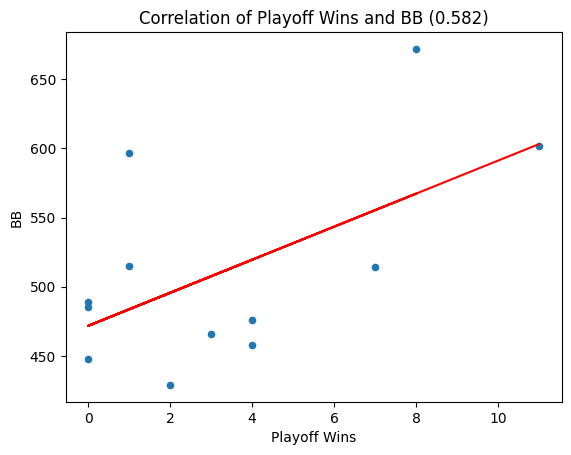

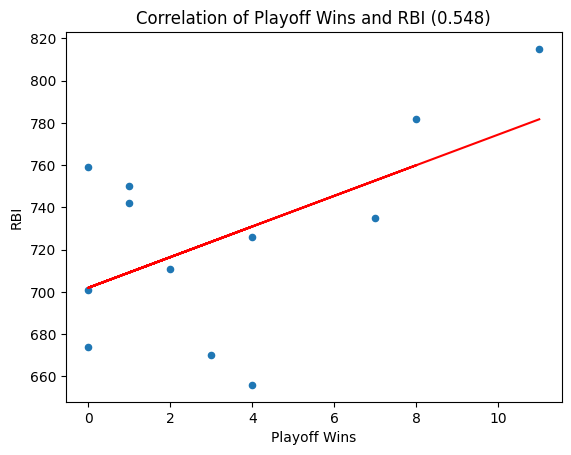

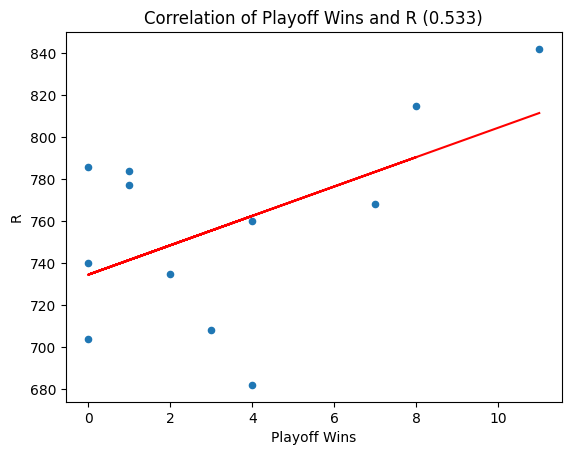

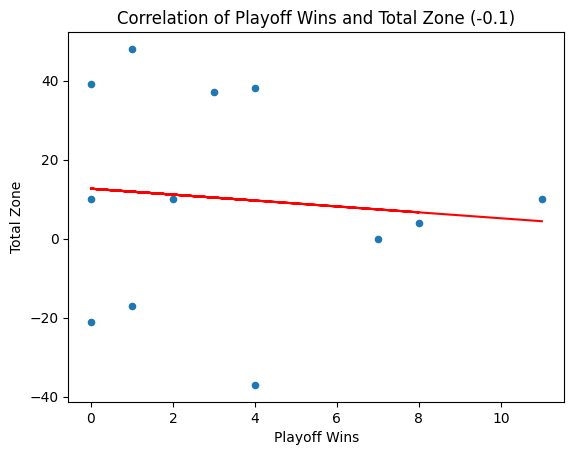

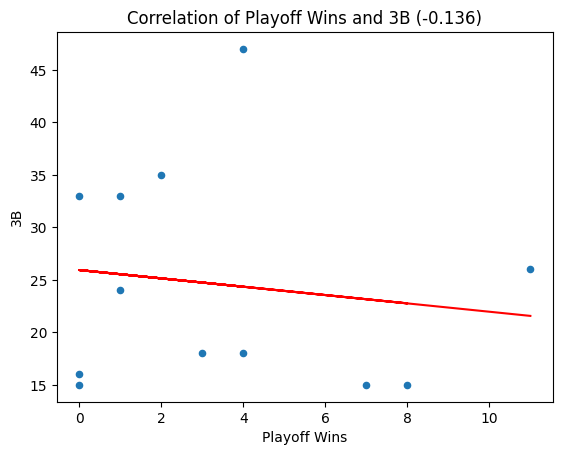

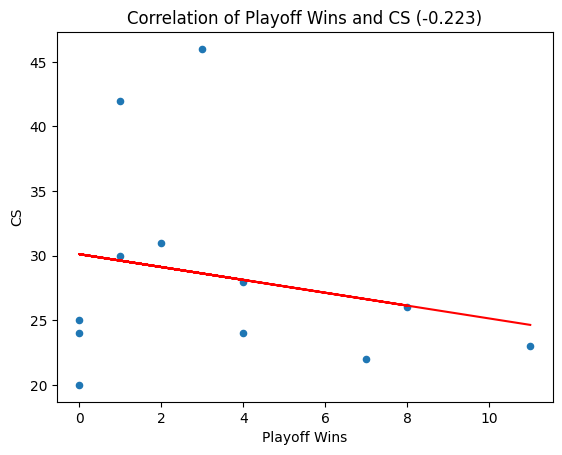

In [59]:
important24 = pd.concat([Correlations24.iloc[:3], Correlations24.iloc[-3:]])
for index, row in important24.iterrows():
    a, b = np.polyfit(postseason_data24['Playoff Wins'], postseason_data24[row['Statistic']], 1)
    postseason_data24.plot.scatter(x = 'Playoff Wins', y = row['Statistic'])
    plt.plot(postseason_data24['Playoff Wins'], a * postseason_data24['Playoff Wins'] + b, color='red', label='Line of Best Fit')
    plt.title(f"Correlation of Playoff Wins and {row['Statistic']} ({round(row['Correlations'], 3)})")
